<a href="https://colab.research.google.com/github/goutam63/machine-learning-/blob/main/ROC_AND_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9839833333333333


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.27, 0.73]])

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# No we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850222222222221


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.56,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.05,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.880262
1      0.115823
2      0.816283
3      0.757853
4      0.557447
         ...   
595    0.123840
596    0.122845
597    0.879197
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [16]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.90922166, 0.90922166, 0.9084413 , 0.90827475, 0.7969465 ,
       0.79662833, 0.78880736, 0.7880558 , 0.78390513, 0.78321156,
       0.75545305, 0.75537124, 0.74336354, 0.74137362, 0.69825746,
       0.69643711, 0.67268151, 0.66743537, 0.60327749, 0.60175354,
       0.59146627, 0.58614346, 0.5821569 , 0.58050386, 0.55292732,
       0.54889283, 0.54115858, 0.53469563, 0.48669266, 0.48366892,
       0.4396034 , 0.40841982, 0.40629719, 0.35768074, 0.35586612,
       0.24404122, 0.23640421, 0.21707968, 0.21646893, 0.21245158,
       0.20598417, 0.12033548, 0.1203351 , 0.10548439])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.439603,0.961667
29,0.483669,0.960000
27,0.534696,0.960000
26,0.541159,0.960000
25,0.548893,0.960000


In [18]:
accuracy_ls

,thresholds,accuracy
30,0.439603,0.961667
29,0.483669,0.960000
27,0.534696,0.960000
26,0.541159,0.960000
25,0.548893,0.960000
28,0.486693,0.958333
24,0.552927,0.958333
31,0.408420,0.953333
23,0.580504,0.953333
22,0.582157,0.951667


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

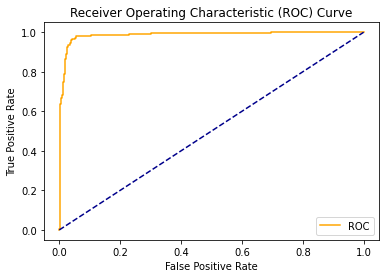

In [20]:
plot_roc_curve(fpr,tpr)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print(ytest_pred)
#print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
[[0.44081427 0.55918573]
 [0.53671782 0.46328218]
 [0.46179786 0.53820214]
 ...
 [0.46759663 0.53240337]
 [0.5582802  0.4417198 ]
 [0.44011043 0.55988957]]
